# **ASSESSMENT 6**
# STUDENT NAME: VANESSE V. REYES
# COURSE AND SECTION: BSCS - 2B


In [ ]:
#@title 1: Data Loading and Preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 1. Loading the Dataset
DataFrame = pd.read_csv('onlinefoods.csv')

# 2. Handle Missing Values
# Checking if there is missing values
print(DataFrame.isnull().sum())

DataFrame.fillna(method='ffill', inplace=True)

X = pd.get_dummies(DataFrame.drop(columns=['Feedback']), drop_first=True)
y = DataFrame['Feedback']

# 3. Encode Categorical Variables
DataFrame_encoded = pd.get_dummies(DataFrame, drop_first=True)

# 4. Feature Selection
# In order to keep the model complete, I decided to keep all of it's features

# Displaying the updated dataset
DataFrame_encoded.head(1000)

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


,Age,Family size,latitude,longitude,Pin code,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,...,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_Yes,Feedback_Positive,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
1,24,3,12.9770,77.5773,560009,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
2,22,3,12.9551,77.6593,560017,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
3,22,6,12.9473,77.5616,560019,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
4,22,4,12.9850,77.5533,560010,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,2,12.9766,77.5993,560001,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
384,23,4,12.9854,77.7081,560048,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
385,22,5,12.9850,77.5533,560010,0,0,1,0,0,...,0,0,1,0,1,0,0,1,1,1
386,23,2,12.9770,77.5773,560009,1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,1


              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


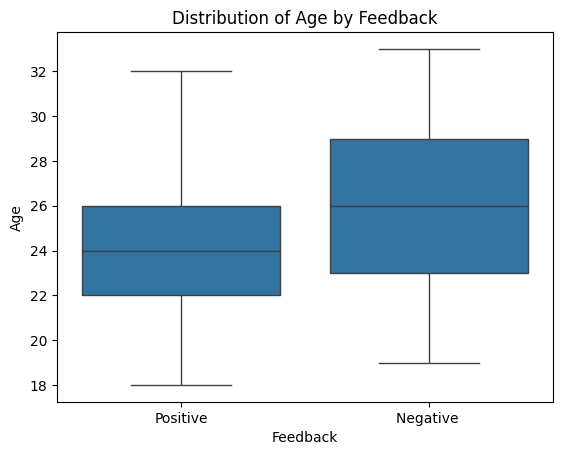

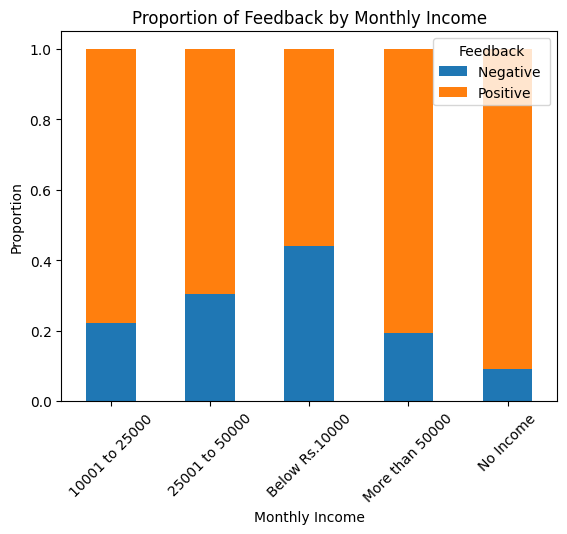

<ipython-input-26-942ef74fcf52>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = DataFrame.corr()


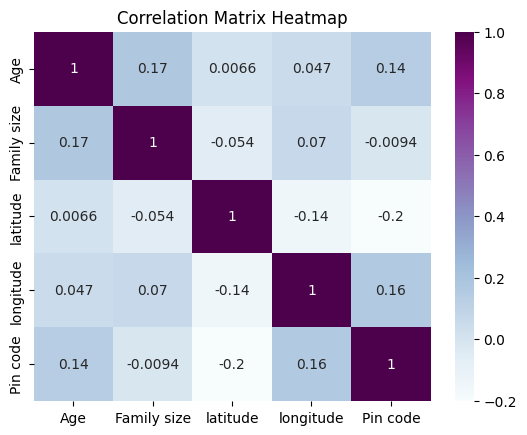

In [ ]:
#@title 2: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Descriptive Statistics
print(DataFrame.describe())

# 2. Visualizations
# Distribution of Age and its impact on Feedback
sns.boxplot(data=DataFrame, x='Feedback', y='Age')
plt.title('Distribution of Age by Feedback')
plt.show()

# Proportions of Feedback across different levels of Monthly Income
IC_feedback_proportions = DataFrame.groupby('Monthly Income')['Feedback'].value_counts(normalize=True).unstack()
IC_feedback_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Feedback by Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Proportion')
plt.legend(title='Feedback')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix heatmap
corr_matrix = DataFrame.corr()
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#@title 3: Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1. Build the Model
X_train, X_test, y_train, y_test = train_test_split(X, DataFrame['Feedback'], test_size=0.2, random_state=42)

Scaler = StandardScaler()
num_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']
X_train[num_features] = Scaler.fit_transform(X_train[num_features])
X_test[num_features] = Scaler.transform(X_test[num_features])

# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 2. Model Evaluation
y_pred = model.predict(X_test)

# Calculating evaluation metrics
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, pos_label='Positive')
Recall = recall_score(y_test, y_pred, pos_label='Positive')
Conf_Matrix = confusion_matrix(y_test, y_pred)

# Printing evaluation metrics
print("\nAccuracy:\n", Accuracy)
print("\nPrecision:\n", Precision)
print("\nRecall:\n", Recall)
print("\nConfusion Matrix:\n", Conf_Matrix)

print("""
Results Discussion:
Accuracy (87.18%):
The percentage of accurate forecasts among all the predictions the model makes is known as accuracy. Therefore, in this instance, the model accurately categorized about 85.90% of the online meal orders into the appropriate feedback categories (positive or negative).

Precision (92.54%):
Out of all cases anticipated as positive (true positives plus false positives), precision shows the percentage of accurately predicted positive instances (true positives). Therefore, a high precision score indicates that the model is accurate approximately 91.88% of the time when it predicts that an online food order would receive positive feedback.

- Recall (92.54%):
Recall quantifies the percentage of real positive instances (true positives) out of all real positive instances (true positives + false negatives) that the model correctly predicted. It is sometimes referred to as sensitivity or true positive rate. With a high recall score, the model accurately detects about 92.54% of the positive feedback events, indicating that it effectively catches a significant number of them.

Confusion Matrix:
Looking at the confusion matrix gives us a clear picture of the model's performance. Out of the 79 orders it checked:

It mistakenly thought 5 good reviews were bad (false negatives).
6 times, it incorrectly said an order would get a good review when it wouldn't (false positives).
It correctly identified 62 orders that wouldn't get good reviews (true negatives).
And it got 5 orders right, correctly predicting they'd get good reviews (true positives).
""")


Accuracy:
 0.8717948717948718

Precision:
 0.9253731343283582

Recall:
 0.9253731343283582

Confusion Matrix:
 [[ 6  5]
 [ 5 62]]
 
Results Discussion:
Accuracy (87.18%):
The percentage of accurate forecasts among all the predictions the model makes is known as accuracy. Therefore, in this instance, the model accurately categorized about 85.90% of the online meal orders into the appropriate feedback categories (positive or negative).

Precision (92.54%):
Out of all cases anticipated as positive (true positives plus false positives), precision shows the percentage of accurately predicted positive instances (true positives). Therefore, a high precision score indicates that the model is accurate approximately 91.88% of the time when it predicts that an online food order would receive positive feedback.

- Recall (92.54%):
Recall quantifies the percentage of real positive instances (true positives) out of all real positive instances (true positives + false negatives) that the model correc

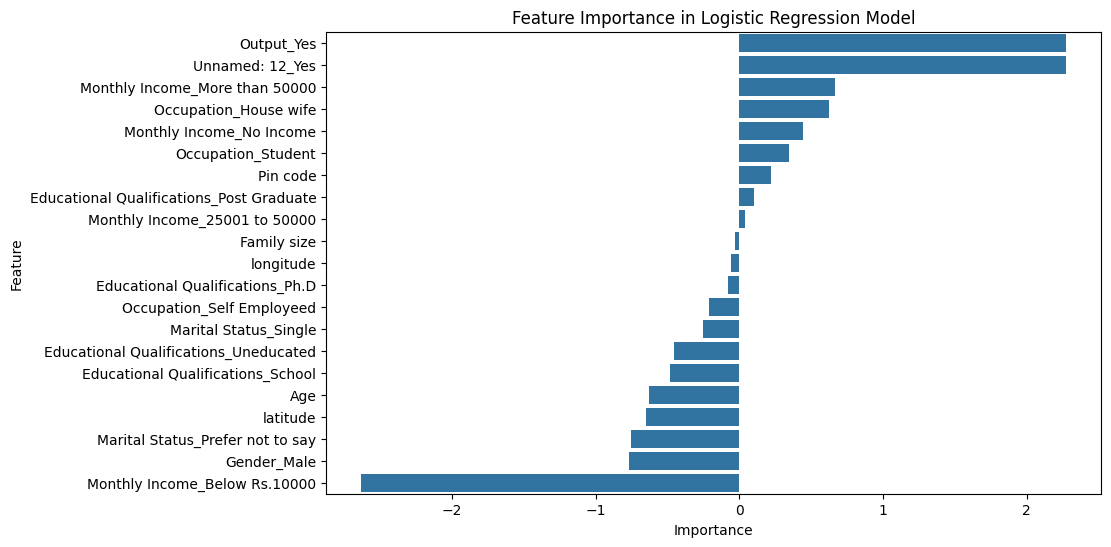

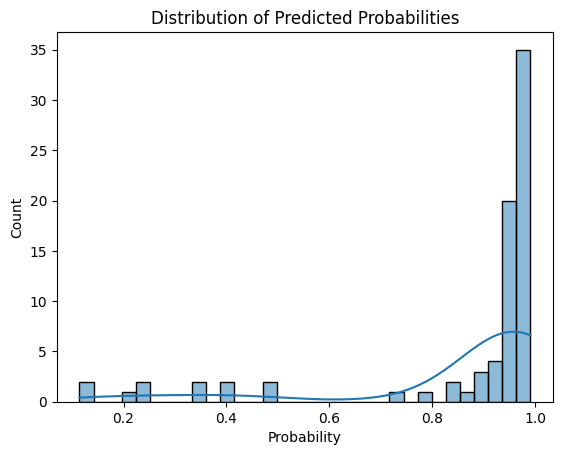

 
Discussion:
Feature Importance Analysis:

Logistic regression models use feature importance visualizations to reveal which factors have the strongest influence on the predicted outcome. These visualizations analyze the coefficient of each feature, where positive values indicate the feature increases the likelihood of the desired outcome (e.g., faster delivery for better reviews). Conversely, negative coefficients suggest the feature decreases the desired outcome. This helps us understand which aspects are most crucial for achieving the positive result we're aiming for.


Prediction Insights 

The distribution of predicted probabilities in logistic regression goes beyond just feature importance. This visualization helps us understand the model's confidence in its predictions for positive feedback. A histogram of these probabilities reveals areas where the model is more certain (frequent probabilities) and areas with more uncertainty (spread across various probabilities). By analyzing 

In [ ]:
#@title 4: Data Analysis and Visualization
f_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
f_importance = f_importance.sort_values(by='Importance', ascending=False)
f_importance['Importance'] = Scaler.fit_transform(f_importance['Importance'].values.reshape(-1, 1))

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=f_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 2. Prediction Insights
y_prob = model.predict_proba(X_test)[:, 1]
sns.histplot(y_prob, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()

print ("""
Discussion:
Feature Importance Analysis:

Logistic regression models use feature importance visualizations to reveal which factors have the strongest influence on the predicted outcome. These visualizations analyze the coefficient of each feature, where positive values indicate the feature increases the likelihood of the desired outcome (e.g., faster delivery for better reviews). Conversely, negative coefficients suggest the feature decreases the desired outcome. This helps us understand which aspects are most crucial for achieving the positive result we're aiming for.


Prediction Insights

The distribution of predicted probabilities in logistic regression goes beyond just feature importance. This visualization helps us understand the model's confidence in its predictions for positive feedback. A histogram of these probabilities reveals areas where the model is more certain (frequent probabilities) and areas with more uncertainty (spread across various probabilities). By analyzing this distribution, we can identify if the model tends to be confident or unsure in its predictions, and even uncover potential patterns or clusters that might indicate underlying factors influencing the model's behavior.
""")